# Accuracy-Size Tradeoff (QA Tasks)
This notebook plots the accuracy-kept_attn tradeoff for QA tasks that were ran. Top-k and Top-theta are expected to show a drop in the accuracy as the number of kept attention elements decreases.

Notebook usage: run the experiments, which will produce the results in the following directories
1. the directory "products" to contain the per-run directories (each named with a unique timestamp) each containing the per-layer "kept_attn" csv.gz files
2. in the directory "results-Llama", for each of the timestamps there should a an accuracy (acc_norm) result specified in one of the txt files 

To use this notebook, specify the list of runs' timestamps for which you would like to see the tradeoff plots under the `RESULTS_META_LIST` list

In [1]:
from data_util import ResultMeta, aggregate_accuracy_and_size_of_many_runs
from plot_util import plot_accuracy_vs_size

### LLaMA2-7b Arc-Challenge
products should be on aime03

In [2]:
# Read a list of runs (each run is uniquely identified by a timestamp) and specify a label for each run as it should appear in the plot
RESULTS_META_LIST = [
    ResultMeta(timestamp='2024-12-09_09-56-22_253796', label='Baseline', k=999),
    ResultMeta(timestamp='2024-12-13_18-20-08_100600', label='Top-θ pre-softmax + vmc + exact-sdc', k=16, ),
    ResultMeta(timestamp='2024-12-11_18-41-55_568447', label='Top-θ pre-softmax + vmc + exact-sdc', k=32, ),
    ResultMeta(timestamp='2024-12-07_01-59-44_797854', label='Top-θ pre-softmax + vmc + exact-sdc', k=64, ),
    ResultMeta(timestamp='2024-12-07_04-28-54_552168', label='Top-θ pre-softmax + vmc + exact-sdc', k=128,),
    ResultMeta(timestamp='2024-12-07_06-56-52_990715', label='Top-θ pre-softmax + vmc + exact-sdc', k=256,),
    ResultMeta(timestamp='2024-12-07_09-01-24_581687', label='Top-θ pre-softmax + vmc + exact-sdc', k=512,),
    ResultMeta(timestamp='2024-12-13_16-07-32_496197', label='Top-θ post-softmax + vmc', k=16, ),
    ResultMeta(timestamp='2024-12-11_13-09-08_256949', label='Top-θ post-softmax + vmc', k=32, ),
    ResultMeta(timestamp='2024-12-06_16-57-17_192637', label='Top-θ post-softmax + vmc', k=64, ),
    ResultMeta(timestamp='2024-12-06_19-43-15_988357', label='Top-θ post-softmax + vmc', k=128,),
    ResultMeta(timestamp='2024-12-06_22-34-54_520903', label='Top-θ post-softmax + vmc', k=256,),
    ResultMeta(timestamp='2024-12-07_00-34-44_365084', label='Top-θ post-softmax + vmc', k=512,),    
    ResultMeta(timestamp='2024-12-13_16-59-13_984836', label='Top-k pre-softmax + vmc + exact-sdc',  k=16, ),
    ResultMeta(timestamp='2024-12-11_18-30-20_311969', label='Top-k pre-softmax + vmc + exact-sdc',  k=32, ),
    ResultMeta(timestamp='2024-12-09_14-31-17_663420', label='Top-k pre-softmax + vmc + exact-sdc',  k=64, ),
    ResultMeta(timestamp='2024-12-09_15-29-44_956031', label='Top-k pre-softmax + vmc + exact-sdc',  k=128,),
    ResultMeta(timestamp='2024-12-09_16-26-47_772096', label='Top-k pre-softmax + vmc + exact-sdc',  k=256,),
    ResultMeta(timestamp='2024-12-09_17-26-41_707717', label='Top-k pre-softmax + vmc + exact-sdc',  k=512,), 
    ResultMeta(timestamp='2024-12-13_16-04-51_172449', label='Top-k post-softmax + vmc',  k=16, ),
    ResultMeta(timestamp='2024-12-11_14-30-15_629557', label='Top-k post-softmax + vmc',  k=32, ),
    ResultMeta(timestamp='2024-12-09_11-38-38_615952', label='Top-k post-softmax + vmc',  k=64, ),
    ResultMeta(timestamp='2024-12-09_12-21-48_609045', label='Top-k post-softmax + vmc',  k=128,),
    ResultMeta(timestamp='2024-12-09_13-04-51_001555', label='Top-k post-softmax + vmc',  k=256,),
    ResultMeta(timestamp='2024-12-09_13-48-35_992065', label='Top-k post-softmax + vmc',  k=512,),        
]
RESULTS_DIR_PATH = "../results-Llama"
PRODUCTS_DIR_PATH = "../products"
INFERENCE_PHASE="prefill"
ACCURACY_METRIC="acc_norm"
SIZE_METRIC="kept_attn"

df_llama2_7_arc_challenge = aggregate_accuracy_and_size_of_many_runs(RESULTS_META_LIST, ACCURACY_METRIC, SIZE_METRIC, INFERENCE_PHASE, RESULTS_DIR_PATH, PRODUCTS_DIR_PATH, num_cores=192)


Reading results in parallel using 192 parallel processes


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


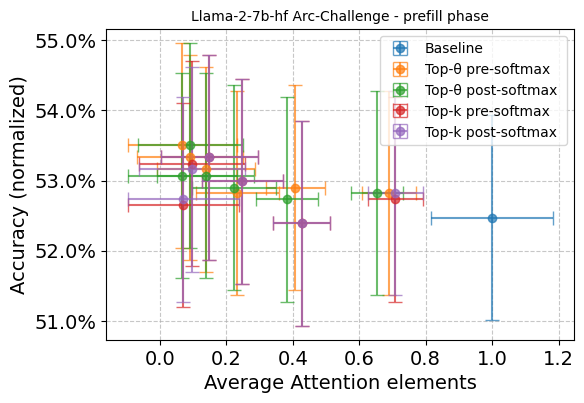

In [29]:
# plot prefill phase - scatterplots with errorbars
model_name = df_llama2_7_arc_challenge.model_name.unique().item()
inference_phase = df_llama2_7_arc_challenge.inference_phase.unique().item()
TITLE = f'{model_name} Arc-Challenge - {inference_phase} phase'
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff"
plot_accuracy_vs_size(df_llama2_7_arc_challenge, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=False,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='errorbar',
                      rcParams_override={'legend.fontsize':10, 'figure.figsize' : [6, 4],},
                      concise_labels=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


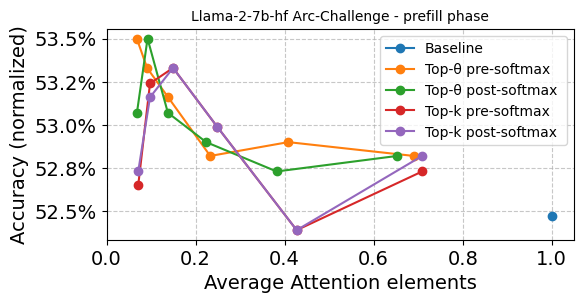

In [30]:
# plot prefill phase - lineplots
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff-lineplots"
plot_accuracy_vs_size(df_llama2_7_arc_challenge, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=True,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='line',
                      rcParams_override={'legend.fontsize':10, 'figure.figsize' : [6, 3],},
                      concise_labels=True)

### LLaMA2-7b Arc-Easy
products should be on aime03

In [8]:
# Read a list of runs (each run is uniquely identified by a timestamp) and specify a label for each run as it should appear in the plot
RESULTS_META_LIST = [
    ResultMeta(timestamp='2024-12-09_09-56-40_731247', label='Baseline', k=999),
    ResultMeta(timestamp='2024-12-13_23-08-26_037083', label='Top-θ pre-softmax + vmc + exact-sdc', k=16, ),
    ResultMeta(timestamp='2024-12-12_07-36-15_784715', label='Top-θ pre-softmax + vmc + exact-sdc', k=32, ),
    ResultMeta(timestamp='2024-12-07_04-36-00_058980', label='Top-θ pre-softmax + vmc + exact-sdc', k=64, ),
    ResultMeta(timestamp='2024-12-07_07-56-21_368125', label='Top-θ pre-softmax + vmc + exact-sdc', k=128,),
    ResultMeta(timestamp='2024-12-07_11-06-16_705636', label='Top-θ pre-softmax + vmc + exact-sdc', k=256,),
    ResultMeta(timestamp='2024-12-07_13-30-58_529645', label='Top-θ pre-softmax + vmc + exact-sdc', k=512,),
    ResultMeta(timestamp='2024-12-13_20-29-31_090753', label='Top-θ post-softmax + vmc', k=16, ),
    ResultMeta(timestamp='2024-12-11_23-48-52_995660', label='Top-θ post-softmax + vmc', k=32, ),
    ResultMeta(timestamp='2024-12-06_16-57-35_332195', label='Top-θ post-softmax + vmc', k=64, ),
    ResultMeta(timestamp='2024-12-06_20-41-47_927626', label='Top-θ post-softmax + vmc', k=128,),
    ResultMeta(timestamp='2024-12-07_00-08-53_821251', label='Top-θ post-softmax + vmc', k=256,),
    ResultMeta(timestamp='2024-12-07_02-25-10_374390', label='Top-θ post-softmax + vmc', k=512,),    
    ResultMeta(timestamp='2024-12-13_19-32-09_922546', label='Top-k pre-softmax + vmc + exact-sdc',  k=16, ),
    ResultMeta(timestamp='2024-12-12_04-24-09_861862', label='Top-k pre-softmax + vmc + exact-sdc',  k=32, ),
    ResultMeta(timestamp='2024-12-09_16-53-29_825099', label='Top-k pre-softmax + vmc + exact-sdc',  k=64, ),
    ResultMeta(timestamp='2024-12-09_18-31-45_052341', label='Top-k pre-softmax + vmc + exact-sdc',  k=128,),
    ResultMeta(timestamp='2024-12-09_19-31-51_147612', label='Top-k pre-softmax + vmc + exact-sdc',  k=256,),
    ResultMeta(timestamp='2024-12-09_20-34-28_698851', label='Top-k pre-softmax + vmc + exact-sdc',  k=512,),    
    ResultMeta(timestamp='2024-12-13_18-07-31_509089', label='Top-k post-softmax + vmc',  k=16, ),
    ResultMeta(timestamp='2024-12-11_22-12-30_036300', label='Top-k post-softmax + vmc',  k=32, ),
    ResultMeta(timestamp='2024-12-09_11-38-47_101391', label='Top-k post-softmax + vmc',  k=64, ),
    ResultMeta(timestamp='2024-12-09_12-56-30_613105', label='Top-k post-softmax + vmc',  k=128,),
    ResultMeta(timestamp='2024-12-09_14-12-53_723470', label='Top-k post-softmax + vmc',  k=256,),
    ResultMeta(timestamp='2024-12-09_15-33-10_252231', label='Top-k post-softmax + vmc',  k=512,),        
]
RESULTS_DIR_PATH = "../results-Llama"
PRODUCTS_DIR_PATH = "../products"
INFERENCE_PHASE="prefill"
ACCURACY_METRIC="acc_norm"
SIZE_METRIC="kept_attn"

df_llama2_7_arc_easy = aggregate_accuracy_and_size_of_many_runs(RESULTS_META_LIST, ACCURACY_METRIC, SIZE_METRIC, INFERENCE_PHASE, RESULTS_DIR_PATH, PRODUCTS_DIR_PATH, num_cores=192)

Reading results in parallel using 192 parallel processes


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


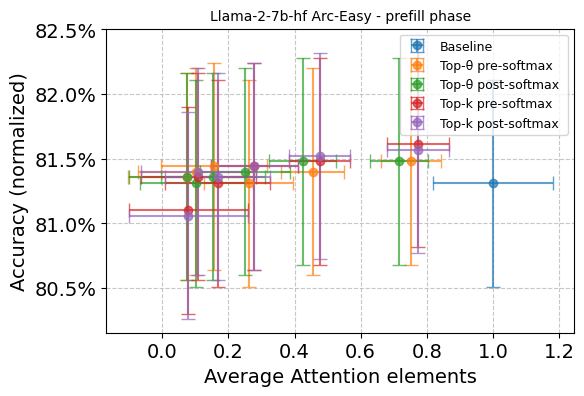

In [31]:
# plot prefill phase - scatterplot with errorbars
model_name = df_llama2_7_arc_easy.model_name.unique().item()
inference_phase = df_llama2_7_arc_easy.inference_phase.unique().item()
TITLE = f'{model_name} Arc-Easy - {inference_phase} phase'
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff"
plot_accuracy_vs_size(df_llama2_7_arc_easy,
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=False,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      rcParams_override={'legend.fontsize':9, 'figure.figsize' : [6, 4],},
                      concise_labels=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


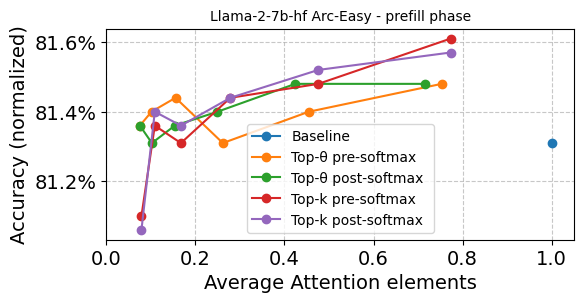

In [32]:
# plot prefill phase - line plots
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff-lineplots"
plot_accuracy_vs_size(df_llama2_7_arc_easy,
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=True,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='line',
                      rcParams_override={'legend.fontsize':10, 'figure.figsize' : [6, 3],},
                      concise_labels=True)

### LLaMA2-7b Hellaswag
products should be on aime03

In [16]:
# Read a list of runs (each run is uniquely identified by a timestamp) and specify a label for each run as it should appear in the plot
RESULTS_META_LIST = [
    ResultMeta(timestamp='2024-12-09_09-56-56_262243', label='Baseline', k=999),
    ResultMeta(timestamp='2024-12-14_23-04-10_199569', label='Top-θ pre-softmax + vmc + exact-sdc', k=16, ),
    ResultMeta(timestamp='2024-12-14_15-04-24_088593', label='Top-θ pre-softmax + vmc + exact-sdc', k=32, ),
    ResultMeta(timestamp='2024-12-06_16-57-56_359320', label='Top-θ pre-softmax + vmc + exact-sdc', k=64, ),
    ResultMeta(timestamp='2024-12-07_15-31-16_906430', label='Top-θ pre-softmax + vmc + exact-sdc', k=128,),
    ResultMeta(timestamp='2024-12-06_16-58-03_962112', label='Top-θ pre-softmax + vmc + exact-sdc', k=256,),
    ResultMeta(timestamp='2024-12-07_13-33-33_348404', label='Top-θ pre-softmax + vmc + exact-sdc', k=512,),
    ResultMeta(timestamp='2024-12-14_05-50-47_244874', label='Top-θ post-softmax + vmc', k=16, ),
    ResultMeta(timestamp='2024-12-12_15-31-20_261558', label='Top-θ post-softmax + vmc', k=32, ),
    ResultMeta(timestamp='2024-12-06_16-57-43_828011', label='Top-θ post-softmax + vmc', k=64, ),
    ResultMeta(timestamp='2024-12-07_13-10-13_820754', label='Top-θ post-softmax + vmc', k=128,),
    ResultMeta(timestamp='2024-12-06_16-57-50_459449', label='Top-θ post-softmax + vmc', k=256,),
    ResultMeta(timestamp='2024-12-07_12-39-06_743129', label='Top-θ post-softmax + vmc', k=512,),    
    ResultMeta(timestamp='2024-12-16_15-30-30_639127', label='Top-k pre-softmax + vmc + exact-sdc',  k=16, ),
    ResultMeta(timestamp='2024-12-12_16-13-31_902309', label='Top-k pre-softmax + vmc + exact-sdc',  k=32, ),
    ResultMeta(timestamp='2024-12-09_11-52-46_697483', label='Top-k pre-softmax + vmc + exact-sdc',  k=64, ),
    ResultMeta(timestamp='2024-12-09_19-00-04_329553', label='Top-k pre-softmax + vmc + exact-sdc',  k=128,),
    ResultMeta(timestamp='2024-12-09_11-39-20_818119', label='Top-k pre-softmax + vmc + exact-sdc',  k=256,),
    ResultMeta(timestamp='2024-12-09_18-55-28_492619', label='Top-k pre-softmax + vmc + exact-sdc',  k=512,),    
    ResultMeta(timestamp='2024-12-13_16-04-59_545314', label='Top-k post-softmax + vmc',  k=16, ),
    ResultMeta(timestamp='2024-12-11_13-09-48_513828', label='Top-k post-softmax + vmc',  k=32, ),
    ResultMeta(timestamp='2024-12-09_11-38-56_145208', label='Top-k post-softmax + vmc',  k=64, ),
    ResultMeta(timestamp='2024-12-09_11-39-05_009237', label='Top-k post-softmax + vmc',  k=128,),
    ResultMeta(timestamp='2024-12-09_16-55-07_140233', label='Top-k post-softmax + vmc',  k=256,),
    ResultMeta(timestamp='2024-12-09_16-56-02_457847', label='Top-k post-softmax + vmc',  k=512,),        
]
RESULTS_DIR_PATH = "../results-Llama"
PRODUCTS_DIR_PATH = "../products"
INFERENCE_PHASE="prefill"
ACCURACY_METRIC="acc_norm"
SIZE_METRIC="kept_attn"

df_llama3_8_hellaswag =  aggregate_accuracy_and_size_of_many_runs(RESULTS_META_LIST, ACCURACY_METRIC, SIZE_METRIC, INFERENCE_PHASE, RESULTS_DIR_PATH, PRODUCTS_DIR_PATH, num_cores=192)

Reading results in parallel using 192 parallel processes


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


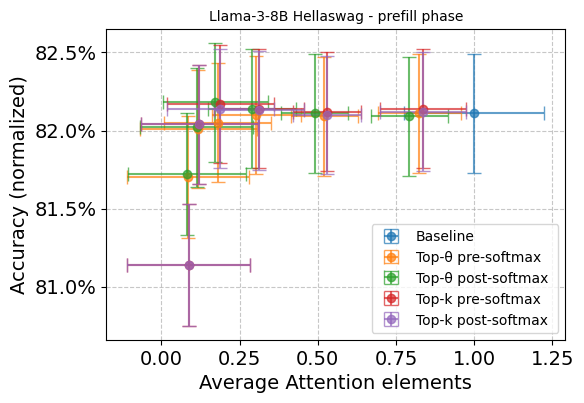

In [33]:
# plot prefill phase - scatterplots with errorbars
model_name = df_llama3_8_hellaswag.model_name.unique().item()
inference_phase = df_llama3_8_hellaswag.inference_phase.unique().item()
TITLE = f'{model_name} Hellaswag - {inference_phase} phase'
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff"
plot_accuracy_vs_size(df_llama3_8_hellaswag, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=False,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='errorbar',
                      rcParams_override={'legend.fontsize':10, 'figure.figsize' : [6, 4],},
                      concise_labels=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


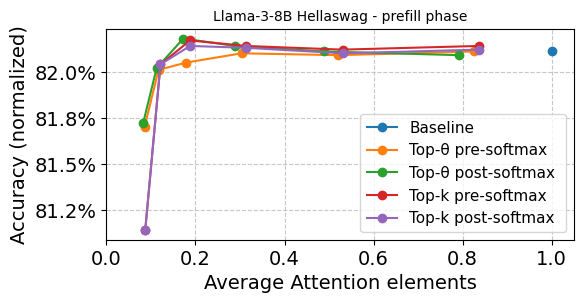

In [34]:
# plot prefill phase - line plots
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff-lineplots"
plot_accuracy_vs_size(df_llama3_8_hellaswag, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=True,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='line',
                      rcParams_override={'legend.fontsize':11, 'figure.figsize' : [6, 3],},
                      concise_labels=True)

### LLaMA-3-8B Arc-Challenge
products should be on aime03

In [19]:
# Read a list of runs (each run is uniquely identified by a timestamp) and specify a label for each run as it should appear in the plot
RESULTS_META_LIST = [
    ResultMeta(timestamp='2024-12-31_11-15-20_275789', label='Baseline', k=999),
    ResultMeta(timestamp='2024-12-31_19-55-03_865450', label='Top-θ pre-softmax + vmc + exact-sdc', k=16, ),
    ResultMeta(timestamp='2024-12-31_21-46-09_516913', label='Top-θ pre-softmax + vmc + exact-sdc', k=32, ),
    ResultMeta(timestamp='2024-12-31_23-32-44_805131', label='Top-θ pre-softmax + vmc + exact-sdc', k=64, ),
    ResultMeta(timestamp='2025-01-01_01-16-40_255536', label='Top-θ pre-softmax + vmc + exact-sdc', k=128,),
    ResultMeta(timestamp='2025-01-01_02-56-42_649411', label='Top-θ pre-softmax + vmc + exact-sdc', k=256,),
    ResultMeta(timestamp='2025-01-01_04-26-32_850071', label='Top-θ pre-softmax + vmc + exact-sdc', k=512,),
    ResultMeta(timestamp='2024-12-31_11-14-04_007624', label='Top-θ post-softmax + vmc', k=16, ),
    ResultMeta(timestamp='2024-12-31_12-54-18_662431', label='Top-θ post-softmax + vmc', k=32, ),
    ResultMeta(timestamp='2024-12-31_14-32-05_372430', label='Top-θ post-softmax + vmc', k=64, ),
    ResultMeta(timestamp='2024-12-31_16-05-46_339391', label='Top-θ post-softmax + vmc', k=128,),
    ResultMeta(timestamp='2024-12-31_17-36-43_726828', label='Top-θ post-softmax + vmc', k=256,),
    ResultMeta(timestamp='2024-12-31_18-55-55_929304', label='Top-θ post-softmax + vmc', k=512,),    
    ResultMeta(timestamp='2024-12-31_11-15-45_303934', label='Top-k pre-softmax + vmc + exact-sdc',  k=16, ),
    ResultMeta(timestamp='2024-12-31_12-14-49_056775', label='Top-k pre-softmax + vmc + exact-sdc',  k=32, ),
    ResultMeta(timestamp='2024-12-31_13-17-36_574192', label='Top-k pre-softmax + vmc + exact-sdc',  k=64, ),
    ResultMeta(timestamp='2024-12-31_14-20-03_974930', label='Top-k pre-softmax + vmc + exact-sdc',  k=128,),
    ResultMeta(timestamp='2024-12-31_15-09-21_515147', label='Top-k pre-softmax + vmc + exact-sdc',  k=256,),
    ResultMeta(timestamp='2024-12-31_15-52-39_160775', label='Top-k pre-softmax + vmc + exact-sdc',  k=512,), 
    ResultMeta(timestamp='2024-12-31_14-47-41_532397', label='Top-k post-softmax + vmc',  k=16, ),
    ResultMeta(timestamp='2024-12-31_15-23-33_530960', label='Top-k post-softmax + vmc',  k=32, ),
    ResultMeta(timestamp='2024-12-31_16-00-07_890393', label='Top-k post-softmax + vmc',  k=64, ),
    ResultMeta(timestamp='2024-12-31_16-35-38_229103', label='Top-k post-softmax + vmc',  k=128,),
    ResultMeta(timestamp='2024-12-31_17-11-20_444005', label='Top-k post-softmax + vmc',  k=256,),
    ResultMeta(timestamp='2024-12-31_17-41-15_950244', label='Top-k post-softmax + vmc',  k=512,),        
]
RESULTS_DIR_PATH = "../results-Llama"
PRODUCTS_DIR_PATH = "../products"
INFERENCE_PHASE="prefill"
ACCURACY_METRIC="acc_norm"
SIZE_METRIC="kept_attn"

df_llama3_8_arc_challenge = aggregate_accuracy_and_size_of_many_runs(RESULTS_META_LIST, ACCURACY_METRIC, SIZE_METRIC, INFERENCE_PHASE, RESULTS_DIR_PATH, PRODUCTS_DIR_PATH, num_cores=192)


Reading results in parallel using 192 parallel processes


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


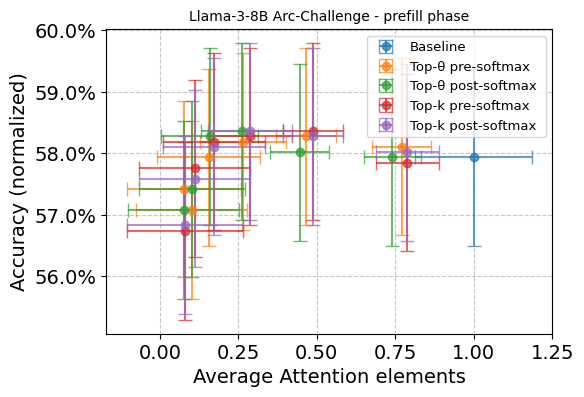

In [35]:
# plot prefill phase - scatterplot with errorbars
model_name = df_llama3_8_arc_challenge.model_name.unique().item()
inference_phase = df_llama3_8_arc_challenge.inference_phase.unique().item()
TITLE = f'{model_name} Arc-Challenge - {inference_phase} phase'
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff"
plot_accuracy_vs_size(df_llama3_8_arc_challenge, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=False,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='errorbar',
                      rcParams_override={'legend.fontsize':9.5, 'figure.figsize' : [6, 4],},
                      concise_labels=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


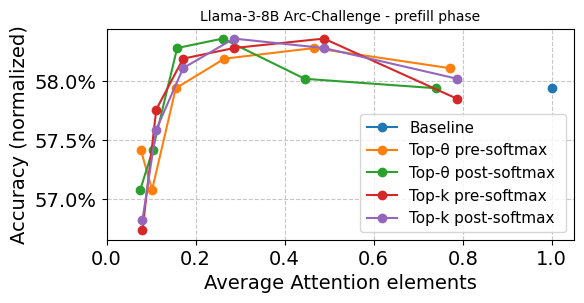

In [36]:
# plot prefill phase - lineplot
model_name = df_llama3_8_arc_challenge.model_name.unique().item()
inference_phase = df_llama3_8_arc_challenge.inference_phase.unique().item()
TITLE = f'{model_name} Arc-Challenge - {inference_phase} phase'
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff-lineplots"
plot_accuracy_vs_size(df_llama3_8_arc_challenge, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=True,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='line',
                      rcParams_override={'legend.fontsize':11, 'figure.figsize' : [6, 3],},
                      concise_labels=True)

### LLaMA-3-8B Arc-Easy
products should be on aime03

In [22]:
# Read a list of runs (each run is uniquely identified by a timestamp) and specify a label for each run as it should appear in the plot
RESULTS_META_LIST = [
    ResultMeta(timestamp='2024-12-31_11-37-34_368689', label='Baseline', k=999),
    ResultMeta(timestamp='2024-12-31_22-10-04_654243', label='Top-θ pre-softmax + vmc + exact-sdc', k=16, ),
    ResultMeta(timestamp='2025-01-01_00-22-38_432305', label='Top-θ pre-softmax + vmc + exact-sdc', k=32, ),
    ResultMeta(timestamp='2025-01-01_02-44-03_141486', label='Top-θ pre-softmax + vmc + exact-sdc', k=64, ),
    ResultMeta(timestamp='2025-01-01_04-54-40_171164', label='Top-θ pre-softmax + vmc + exact-sdc', k=128,),
    ResultMeta(timestamp='2025-01-01_06-53-04_494976', label='Top-θ pre-softmax + vmc + exact-sdc', k=256,),
    ResultMeta(timestamp='2025-01-01_08-33-44_947531', label='Top-θ pre-softmax + vmc + exact-sdc', k=512,),
    ResultMeta(timestamp='2024-12-31_11-14-17_529791', label='Top-θ post-softmax + vmc', k=16, ),
    ResultMeta(timestamp='2024-12-31_13-21-08_682609', label='Top-θ post-softmax + vmc', k=32, ),
    ResultMeta(timestamp='2024-12-31_15-20-48_811702', label='Top-θ post-softmax + vmc', k=64, ),
    ResultMeta(timestamp='2024-12-31_17-22-23_886542', label='Top-θ post-softmax + vmc', k=128,),
    ResultMeta(timestamp='2024-12-31_19-13-57_534962', label='Top-θ post-softmax + vmc', k=256,),
    ResultMeta(timestamp='2024-12-31_20-51-21_051205', label='Top-θ post-softmax + vmc', k=512,),    
    ResultMeta(timestamp='2024-12-31_20-43-16_933089', label='Top-k pre-softmax + vmc + exact-sdc',  k=16, ),
    ResultMeta(timestamp='2024-12-31_21-26-16_691044', label='Top-k pre-softmax + vmc + exact-sdc',  k=32, ),
    ResultMeta(timestamp='2024-12-31_22-09-08_825859', label='Top-k pre-softmax + vmc + exact-sdc',  k=64, ),
    ResultMeta(timestamp='2024-12-31_22-52-08_050815', label='Top-k pre-softmax + vmc + exact-sdc',  k=128,),
    ResultMeta(timestamp='2024-12-31_23-34-11_443517', label='Top-k pre-softmax + vmc + exact-sdc',  k=256,),
    ResultMeta(timestamp='2025-01-01_00-14-59_572045', label='Top-k pre-softmax + vmc + exact-sdc',  k=512,),    
    ResultMeta(timestamp='2024-12-31_16-32-31_452754', label='Top-k post-softmax + vmc',  k=16, ),
    ResultMeta(timestamp='2024-12-31_17-36-06_730878', label='Top-k post-softmax + vmc',  k=32, ),
    ResultMeta(timestamp='2024-12-31_18-27-21_841516', label='Top-k post-softmax + vmc',  k=64, ),
    ResultMeta(timestamp='2024-12-31_19-01-38_090477', label='Top-k post-softmax + vmc',  k=128,),
    ResultMeta(timestamp='2024-12-31_19-35-38_727592', label='Top-k post-softmax + vmc',  k=256,),
    ResultMeta(timestamp='2024-12-31_20-10-05_716761', label='Top-k post-softmax + vmc',  k=512,),        
]
RESULTS_DIR_PATH = "../results-Llama"
PRODUCTS_DIR_PATH = "../products"
INFERENCE_PHASE="prefill"
ACCURACY_METRIC="acc_norm"
SIZE_METRIC="kept_attn"

df_llama3_8_arc_easy = aggregate_accuracy_and_size_of_many_runs(RESULTS_META_LIST, ACCURACY_METRIC, SIZE_METRIC, INFERENCE_PHASE, RESULTS_DIR_PATH, PRODUCTS_DIR_PATH, num_cores=192)


Reading results in parallel using 192 parallel processes


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


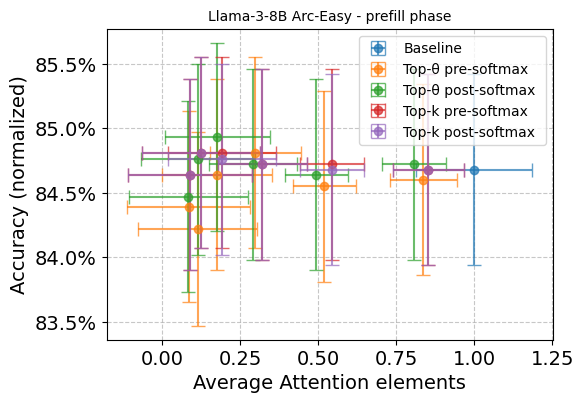

In [37]:
# plot prefill phase - scatterplot with errorbars
model_name = df_llama3_8_arc_easy.model_name.unique().item()
inference_phase = df_llama3_8_arc_easy.inference_phase.unique().item()
TITLE = f'{model_name} Arc-Easy - {inference_phase} phase'
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff"
plot_accuracy_vs_size(df_llama3_8_arc_easy,
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=False,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='errorbar',
                      rcParams_override={'legend.fontsize':10, 'figure.figsize' : [6, 4],},
                      concise_labels=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


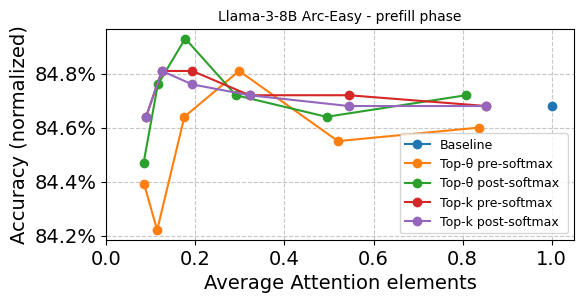

In [39]:
# plot prefill phase - lineplot
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff-lineplots"
plot_accuracy_vs_size(df_llama3_8_arc_easy,
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=True,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='line',
                      rcParams_override={'legend.fontsize':9, 'figure.figsize' : [6, 3],},
                      concise_labels=True)

### LLaMA-3-8B Hellaswag
products should be on aime03

In [25]:
# Read a list of runs (each run is uniquely identified by a timestamp) and specify a label for each run as it should appear in the plot
RESULTS_META_LIST = [
    ResultMeta(timestamp='2024-12-31_12-14-24_563368', label='Baseline', k=999),
    ResultMeta(timestamp='2024-12-31_11-15-08_890042', label='Top-θ pre-softmax + vmc + exact-sdc', k=16, ),
    ResultMeta(timestamp='2025-01-01_02-09-20_336281', label='Top-θ pre-softmax + vmc + exact-sdc', k=32, ),
    ResultMeta(timestamp='2025-01-01_16-49-52_793671', label='Top-θ pre-softmax + vmc + exact-sdc', k=64, ),
    ResultMeta(timestamp='2025-01-02_07-00-56_434869', label='Top-θ pre-softmax + vmc + exact-sdc', k=128,),
    ResultMeta(timestamp='2025-01-02_20-27-02_802452', label='Top-θ pre-softmax + vmc + exact-sdc', k=256,),
    ResultMeta(timestamp='2025-01-03_08-10-41_809338', label='Top-θ pre-softmax + vmc + exact-sdc', k=512,),
    ResultMeta(timestamp='2024-12-31_11-14-27_076070', label='Top-θ post-softmax + vmc', k=16, ),
    ResultMeta(timestamp='2025-01-01_02-08-16_164831', label='Top-θ post-softmax + vmc', k=32, ),
    ResultMeta(timestamp='2025-01-01_16-48-38_633704', label='Top-θ post-softmax + vmc', k=64, ),
    ResultMeta(timestamp='2025-01-02_06-59-41_962129', label='Top-θ post-softmax + vmc', k=128,),
    ResultMeta(timestamp='2025-01-02_20-25-52_955695', label='Top-θ post-softmax + vmc', k=256,),
    ResultMeta(timestamp='2025-01-03_08-09-19_805932', label='Top-θ post-softmax + vmc', k=512,),    
    ResultMeta(timestamp='2024-12-31_11-16-07_746958', label='Top-k pre-softmax + vmc + exact-sdc',  k=16, ),
    ResultMeta(timestamp='2024-12-31_16-33-00_980078', label='Top-k pre-softmax + vmc + exact-sdc',  k=32, ),
    ResultMeta(timestamp='2024-12-31_21-42-12_513695', label='Top-k pre-softmax + vmc + exact-sdc',  k=64, ),
    ResultMeta(timestamp='2025-01-01_02-53-19_787294', label='Top-k pre-softmax + vmc + exact-sdc',  k=128,),
    ResultMeta(timestamp='2025-01-01_07-59-58_641961', label='Top-k pre-softmax + vmc + exact-sdc',  k=256,),
    ResultMeta(timestamp='2025-01-01_13-04-11_814893', label='Top-k pre-softmax + vmc + exact-sdc',  k=512,),    
    ResultMeta(timestamp='2024-12-31_11-15-55_507141', label='Top-k post-softmax + vmc',  k=16, ),
    ResultMeta(timestamp='2024-12-31_16-24-22_941184', label='Top-k post-softmax + vmc',  k=32, ),
    ResultMeta(timestamp='2024-12-31_21-26-00_980049', label='Top-k post-softmax + vmc',  k=64, ),
    ResultMeta(timestamp='2025-01-01_02-22-16_660253', label='Top-k post-softmax + vmc',  k=128,),
    ResultMeta(timestamp='2025-01-01_07-12-04_691820', label='Top-k post-softmax + vmc',  k=256,),
    ResultMeta(timestamp='2025-01-01_12-01-07_107604', label='Top-k post-softmax + vmc',  k=512,),        
]
RESULTS_DIR_PATH = "../results-Llama"
PRODUCTS_DIR_PATH = "../products"
INFERENCE_PHASE="prefill"
ACCURACY_METRIC="acc_norm"
SIZE_METRIC="kept_attn"

df_llama3_8_hellaswag =  aggregate_accuracy_and_size_of_many_runs(RESULTS_META_LIST, ACCURACY_METRIC, SIZE_METRIC, INFERENCE_PHASE, RESULTS_DIR_PATH, PRODUCTS_DIR_PATH, num_cores=192)

Reading results in parallel using 192 parallel processes


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


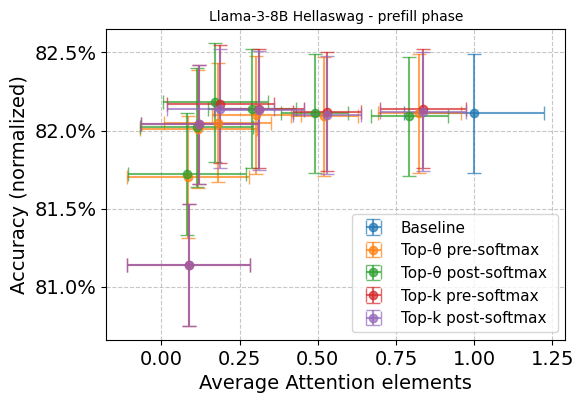

In [41]:
# plot prefill phase - scatterplot with errorbars
model_name = df_llama3_8_hellaswag.model_name.unique().item()
inference_phase = df_llama3_8_hellaswag.inference_phase.unique().item()
TITLE = f'{model_name} Hellaswag - {inference_phase} phase'
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff"
plot_accuracy_vs_size(df_llama3_8_hellaswag, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=False,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='errorbar',
                      rcParams_override={'legend.fontsize':11, 'figure.figsize' : [6, 4],},
                      concise_labels=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


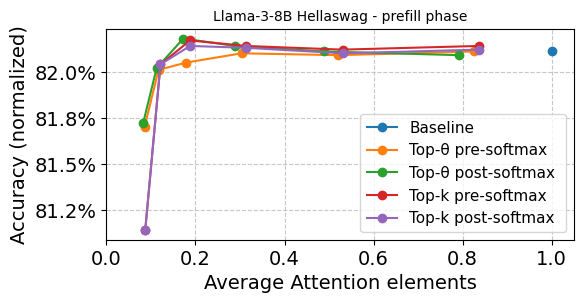

In [42]:
# plot prefill phase - lineplot
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff-lineplots"
plot_accuracy_vs_size(df_llama3_8_hellaswag, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=True,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='line',
                      rcParams_override={'legend.fontsize':11, 'figure.figsize' : [6, 3],},
                      concise_labels=True)

### LLaMA-3-70B Arc-Challenge
products should be on aime03

In [2]:
# Read a list of runs (each run is uniquely identified by a timestamp) and specify a label for each run as it should appear in the plot
RESULTS_META_LIST = [
    ResultMeta(timestamp='2025-01-09_17-43-57_255066', label='Baseline', k=999),
    ResultMeta(timestamp='2025-01-11_20-36-42_800777', label='Top-θ pre-softmax + vmc + exact-sdc', k=32, ),
    ResultMeta(timestamp='2025-01-12_05-34-18_024455', label='Top-θ pre-softmax + vmc + exact-sdc', k=128,),
    ResultMeta(timestamp='2025-01-12_13-51-14_112940', label='Top-θ pre-softmax + vmc + exact-sdc', k=512,),
    ResultMeta(timestamp='2025-01-10_23-39-12_392852', label='Top-θ post-softmax + vmc', k=32, ),
    ResultMeta(timestamp='2025-01-11_07-59-05_418890', label='Top-θ post-softmax + vmc', k=128,),
    ResultMeta(timestamp='2025-01-11_15-36-05_873194', label='Top-θ post-softmax + vmc', k=512,),    
    ResultMeta(timestamp='2025-01-10_16-11-11_180939', label='Top-k pre-softmax + vmc + exact-sdc',  k=32, ),
    ResultMeta(timestamp='2025-01-10_18-46-25_324398', label='Top-k pre-softmax + vmc + exact-sdc',  k=128,),
    ResultMeta(timestamp='2025-01-10_21-19-15_138110', label='Top-k pre-softmax + vmc + exact-sdc',  k=512,), 
    ResultMeta(timestamp='2025-01-10_10-08-42_306603', label='Top-k post-softmax + vmc',  k=32, ),
    ResultMeta(timestamp='2025-01-10_12-10-24_888981', label='Top-k post-softmax + vmc',  k=128,),
    ResultMeta(timestamp='2025-01-10_14-12-13_591044', label='Top-k post-softmax + vmc',  k=512,),        
]
RESULTS_DIR_PATH = "../results-Llama"
PRODUCTS_DIR_PATH = "../products"
INFERENCE_PHASE="prefill"
ACCURACY_METRIC="acc_norm"
SIZE_METRIC="kept_attn"

df_llama3_70_arc_challenge = aggregate_accuracy_and_size_of_many_runs(RESULTS_META_LIST, ACCURACY_METRIC, SIZE_METRIC, INFERENCE_PHASE, RESULTS_DIR_PATH, PRODUCTS_DIR_PATH, num_cores=192)


Reading results in parallel using 192 parallel processes


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


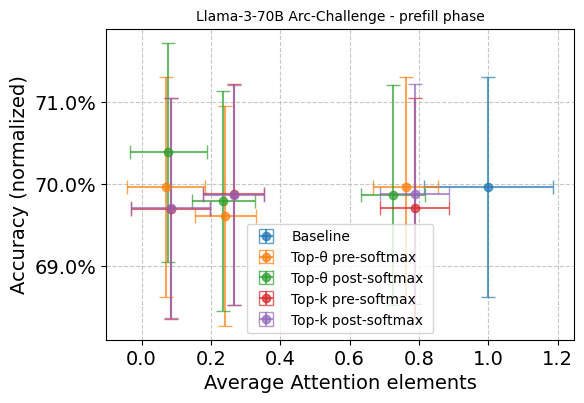

In [11]:
# plot prefill phase - scatterplot with errorbars
model_name = df_llama3_70_arc_challenge.model_name.unique().item()
inference_phase = df_llama3_70_arc_challenge.inference_phase.unique().item()
TITLE = f'{model_name} Arc-Challenge - {inference_phase} phase'
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff"
plot_accuracy_vs_size(df_llama3_70_arc_challenge, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=False,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      accuracy_jitter=0.2,
                      plot_type='errorbar',
                      rcParams_override={'legend.fontsize':10, 'figure.figsize' : [6, 4],},
                      concise_labels=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


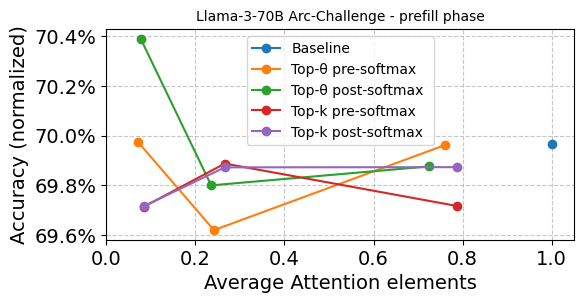

In [12]:
# plot prefill phase - lineplots
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff-lineplots"
plot_accuracy_vs_size(df_llama3_70_arc_challenge, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=True,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      accuracy_jitter=0.01,
                      plot_type='line',
                      rcParams_override={'legend.fontsize':10, 'figure.figsize' : [6, 3],},
                      concise_labels=True)

### LLaMA-3-70B Arc-Easy
products should be on aime03

In [5]:
# Read a list of runs (each run is uniquely identified by a timestamp) and specify a label for each run as it should appear in the plot
RESULTS_META_LIST = [
    ResultMeta(timestamp='2025-01-09_19-33-41_818520', label='Baseline', k=999),
    ResultMeta(timestamp='2025-01-14_19-56-47_339089', label='Top-θ pre-softmax + vmc + exact-sdc', k=32, ),
    ResultMeta(timestamp='2025-01-15_07-21-07_465420', label='Top-θ pre-softmax + vmc + exact-sdc', k=128,),
    ResultMeta(timestamp='2025-01-15_17-50-15_044099', label='Top-θ pre-softmax + vmc + exact-sdc', k=512,),
    ResultMeta(timestamp='2025-01-13_17-51-41_084262', label='Top-θ post-softmax + vmc', k=32, ),
    ResultMeta(timestamp='2025-01-14_04-14-06_435151', label='Top-θ post-softmax + vmc', k=128,),
    ResultMeta(timestamp='2025-01-14_13-48-44_111918', label='Top-θ post-softmax + vmc', k=512,),    
    ResultMeta(timestamp='2025-01-13_05-35-59_460681', label='Top-k pre-softmax + vmc + exact-sdc',  k=32, ),
    ResultMeta(timestamp='2025-01-13_09-51-18_969210', label='Top-k pre-softmax + vmc + exact-sdc',  k=128,),
    ResultMeta(timestamp='2025-01-13_14-03-12_697426', label='Top-k pre-softmax + vmc + exact-sdc',  k=512,), 
    ResultMeta(timestamp='2025-01-12_19-20-17_405037', label='Top-k post-softmax + vmc',  k=32, ),
    ResultMeta(timestamp='2025-01-12_22-47-25_759785', label='Top-k post-softmax + vmc',  k=128,),
    ResultMeta(timestamp='2025-01-13_02-14-17_498525', label='Top-k post-softmax + vmc',  k=512,),          
]
RESULTS_DIR_PATH = "../results-Llama"
PRODUCTS_DIR_PATH = "../products"
INFERENCE_PHASE="prefill"
ACCURACY_METRIC="acc_norm"
SIZE_METRIC="kept_attn"

df_llama3_70_arc_easy = aggregate_accuracy_and_size_of_many_runs(RESULTS_META_LIST, ACCURACY_METRIC, SIZE_METRIC, INFERENCE_PHASE, RESULTS_DIR_PATH, PRODUCTS_DIR_PATH, num_cores=192)


Reading results in parallel using 192 parallel processes


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


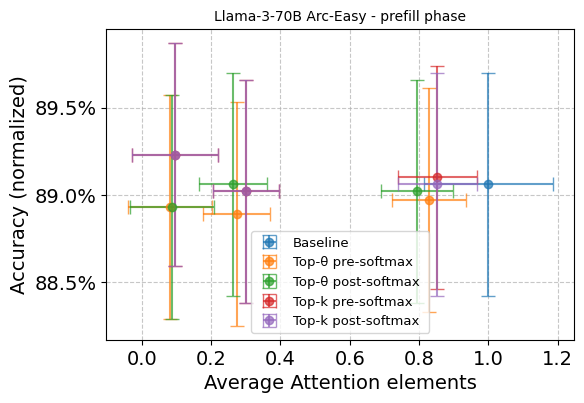

In [6]:
# plot prefill phase - scatterplot with errorbars
model_name = df_llama3_70_arc_easy.model_name.unique().item()
inference_phase = df_llama3_70_arc_easy.inference_phase.unique().item()
TITLE = f'{model_name} Arc-Easy - {inference_phase} phase'
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff"
plot_accuracy_vs_size(df_llama3_70_arc_easy,
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=False,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='errorbar',
                      rcParams_override={'legend.fontsize':9.5, 'figure.figsize' : [6, 4],},
                      concise_labels=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


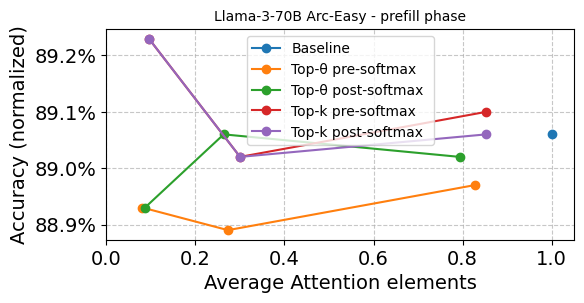

In [7]:
# plot prefill phase - lineplots
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff-lineplots"
plot_accuracy_vs_size(df_llama3_70_arc_easy,
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=True,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='line',
                      rcParams_override={'legend.fontsize':10, 'figure.figsize' : [6, 3],},
                      concise_labels=True)

### LLaMA-3-70B Hellaswag
products should be on aime03

In [8]:
# Read a list of runs (each run is uniquely identified by a timestamp) and specify a label for each run as it should appear in the plot
RESULTS_META_LIST = [
    ResultMeta(timestamp='2025-01-09_22-16-59_652873', label='Baseline', k=999),
    # ResultMeta(timestamp='', label='Top-θ pre-softmax + vmc + exact-sdc', k=32, ),
    # ResultMeta(timestamp='', label='Top-θ pre-softmax + vmc + exact-sdc', k=128,),
    # ResultMeta(timestamp='', label='Top-θ pre-softmax + vmc + exact-sdc', k=512,),
    ResultMeta(timestamp='2025-01-23_08-23-39_956434', label='Top-θ post-softmax + vmc', k=32, ),
    # ResultMeta(timestamp='', label='Top-θ post-softmax + vmc', k=128,),
    # ResultMeta(timestamp='', label='Top-θ post-softmax + vmc', k=512,),    
    ResultMeta(timestamp='2025-01-18_04-25-07_022446', label='Top-k pre-softmax + vmc + exact-sdc',  k=32, ),
    ResultMeta(timestamp='2025-01-18_23-16-55_459915', label='Top-k pre-softmax + vmc + exact-sdc',  k=128,),
    # ResultMeta(timestamp='2025-01-19_17-33-20_703527', label='Top-k pre-softmax + vmc + exact-sdc',  k=512,),  # problematic data-point
    ResultMeta(timestamp='2025-01-16_00-26-48_852647', label='Top-k post-softmax + vmc',  k=32, ),
    ResultMeta(timestamp='2025-01-16_15-26-13_635700', label='Top-k post-softmax + vmc',  k=128,),
    ResultMeta(timestamp='2025-01-17_12-45-47_745714', label='Top-k post-softmax + vmc',  k=512,),        
]
RESULTS_DIR_PATH = "../results-Llama"
PRODUCTS_DIR_PATH = "../products"
INFERENCE_PHASE="prefill"
ACCURACY_METRIC="acc_norm"
SIZE_METRIC="kept_attn"

df_llama3_70_hellaswag =  aggregate_accuracy_and_size_of_many_runs(RESULTS_META_LIST, ACCURACY_METRIC, SIZE_METRIC, INFERENCE_PHASE, RESULTS_DIR_PATH, PRODUCTS_DIR_PATH, num_cores=192)

Reading results in parallel using 192 parallel processes


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


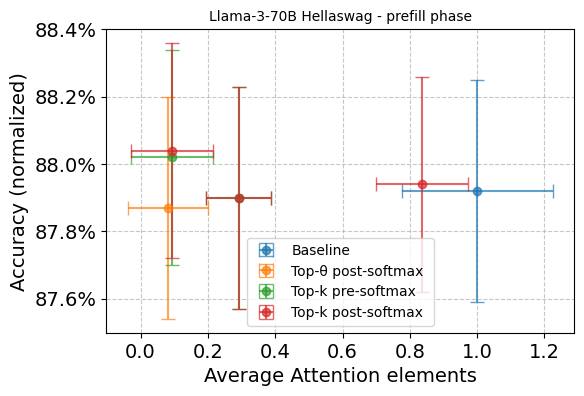

In [9]:
# plot prefill phase - scatterplots with errorbars
model_name = df_llama3_70_hellaswag.model_name.unique().item()
inference_phase = df_llama3_70_hellaswag.inference_phase.unique().item()
TITLE = f'{model_name} Hellaswag - {inference_phase} phase'
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff"
plot_accuracy_vs_size(df_llama3_70_hellaswag, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=False,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='errorbar',
                      rcParams_override={'legend.fontsize':10, 'figure.figsize' : [6, 4],},
                      concise_labels=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


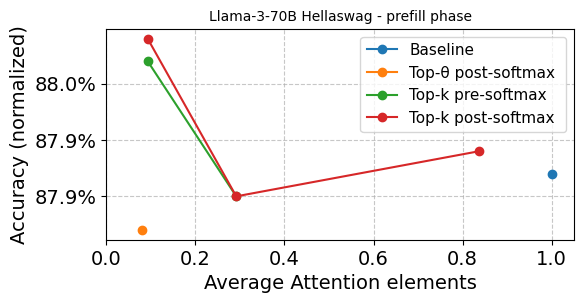

In [10]:
# plot prefill phase - lineplots
OUTPUT_DIR_PATH = "../figures/accuracy-kept_attn-kept_vrow-tradeoff-lineplots"
plot_accuracy_vs_size(df_llama3_70_hellaswag, 
                      TITLE, 
                      OUTPUT_DIR_PATH, 
                      full_xlim=True,
                      full_ylim=False,
                      normalize_size_by_fullsize=True,
                      x_label_prefix="Average", #"Average (across layers, heads, forward passes)",
                      plot_type='line',
                      rcParams_override={'legend.fontsize':11, 'figure.figsize' : [6, 3],},
                      concise_labels=True)

# WIP: finish LLaMA-3-70B runs on aime02,aime03 archive their results.